In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
outbound = pd.read_csv('../data/clean/LAX_Origin_Flight_Delays_2016.csv')
inbound = pd.read_csv('../data/clean/LAX_Dest_Flight_Delays_2016.csv')

outbound_delays = outbound.loc[outbound['DepDel15'] == 1]
inbound_delays = inbound.loc[inbound['ArrDel15'] == 1]

In [5]:
outbound_cause = outbound_delays[['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
outbound_cause = outbound_cause.dropna(axis=0, how='any').reset_index(drop=True)
outbound_cause.head()

,Month,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,62.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,16.0,0.0,0.0
2,1,17.0,0.0,21.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,29.0
4,1,48.0,0.0,0.0,0.0,0.0


In [8]:
total_delay_minutes = int(outbound_delays['DepDelay'].sum())
total_delay_minutes

2730353

In [10]:
monthly_delay_minutes = outbound_cause.groupby(['Month']).sum().astype(int)
monthly_delay_minutes['Total'] = monthly_delay_minutes.sum(axis=1)
monthly_delay_minutes.head()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total
Month,,,,,,
1,60241,3550,31189,270,74144,169394
2,43897,2824,27675,193,51497,126086
3,62483,2720,40930,219,78692,185044
4,50024,1040,25945,21,67966,144996
5,56845,2288,27104,180,70896,157313


In [16]:
perc_df = pd.DataFrame()

for col in monthly_delay_minutes:
    perc_df[col] = round((monthly_delay_minutes[col]/monthly_delay_minutes['Total'])*100, 2)

perc_df

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total
Month,,,,,,
1,35.56,2.10,18.41,0.16,43.77,100.0
2,34.82,2.24,21.95,0.15,40.84,100.0
3,33.77,1.47,22.12,0.12,42.53,100.0
4,34.50,0.72,17.89,0.01,46.87,100.0
5,36.13,1.45,17.23,0.11,45.07,100.0
6,36.07,0.65,13.51,0.23,49.54,100.0
7,34.05,0.89,19.68,0.25,45.13,100.0
8,36.75,0.76,17.70,2.26,42.52,100.0
9,38.33,0.77,15.76,0.64,44.49,100.0


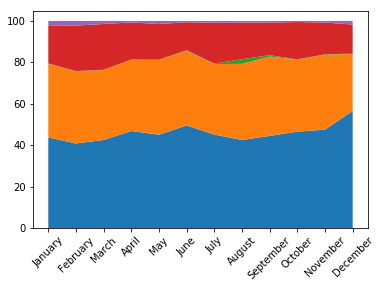

In [21]:
months = calendar.month_name[1:13]
x_axis = np.arange(0, 12, 1)


plt.stackplot(x_axis,
              perc_df['LateAircraftDelay'],
              perc_df['CarrierDelay'],
              perc_df['SecurityDelay'],
              perc_df['NASDelay'],
              perc_df['WeatherDelay'])
plt.xticks(x_axis, months, rotation=45)
plt.show()